In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data =  np.loadtxt(fname = 'trace_201708/prep2.csv', delimiter = ',')

X = data[:, 0]   

In [18]:
sse = []
list_k = list(range(3, 20))

for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X.reshape(-1, 1))
    sse.append(kmeans.inertia_)
    print("iteration: " + str(k))
    

iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19


Text(0, 0.5, 'Sum of squared distance')

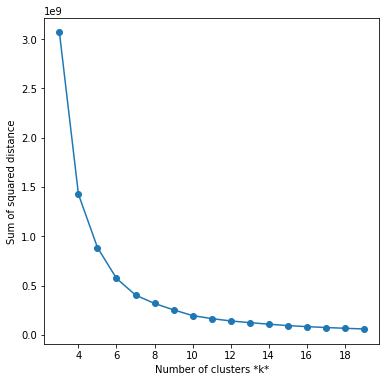

In [19]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [20]:
print(sse)

[3066049182.8733525, 1425444923.8743498, 885593803.6232616, 573048847.8504744, 403685367.16004646, 318728795.5113688, 253832313.57092282, 195951207.77370173, 165364304.48330793, 141451545.72738346, 124251015.61215398, 108940145.0785844, 94308187.11226635, 84055933.19975431, 74991394.80781071, 67221706.25925599, 60053782.80545126]


In [21]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X.reshape(-1, 1))
kmeans.score(X.reshape(-1,1))

-318728795.51136905

In [23]:
f1 = open("trace_201708/prep2.csv", 'r')
f2 = open("trace_201708/prep3.csv", 'w')
loop = 0
total_time=[0,0,0,0,0,0,0,0]
size=[0,0,0,0,0,0,0,0]

while True:
    loop +=1
    if loop % 100000 == 0:  #대략 113만 줄
        print(loop)

    line = f1.readline()
    if not line: break
    comp = line.split(",")
    # time, job, task, machine, avgcpu, avgmem
    tm = int(comp[0])


    pr = kmeans.predict([[tm]])[0]
    size[pr]+=1
    total_time[pr]+=int(comp[1])
    newline = str(pr) + "," + line
    f2.write(newline)


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [30]:
avg_time=[0,0,0,0,0,0,0,0]
for i in range(8):
    avg_time = total_time[i]/size[i]
    #print("i = " + str(i) + " " + str(avg_time[i]))
    print("i=" + str(i) + "\t" + str(total_time[i]) + "\t" + str(size[i]))
f1.close()
f2.close()

i=0	6223832046	157618
i=1	1502141113	38135
i=2	17488844589	443256
i=3	12551220	198
i=4	695957557	17870
i=5	2785595597	71750
i=6	12182560747	286023
i=7	4290833269	118445
